In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [3]:
excel_file = 'Raw_Dataset.xlsx'
xls = pd.ExcelFile(excel_file)

In [9]:
print("Sheet 1: customer_interaction_data")
df1 = pd.read_excel(xls, 'customer_interaction_data')
print(df1.head())
print(df1.info())
print(df1.isnull().sum())
print(df1.describe())
print("Sheet 2: customer_feedback_data")
df2 = pd.read_excel(xls, 'customer_feedback_data')
print(df2.head())
print(df2.info())
print(df2.isnull().sum())
print(df2.describe())
print("Sheet 3: transaction_purchase_data")
df3 = pd.read_excel(xls, 'transaction_purchase_data')
print(df3.head())
print(df3.info())
print(df3.isnull().sum())
print(df3.describe())
print("Sheet 4: demographic_segmentation_data")
df4 = pd.read_excel(xls, 'demographic_segmentation_data')
print(df4.head())
print(df4.info())
print(df4.isnull().sum())
print(df4.describe())

Sheet 1: customer_interaction_data
   Customer ID Interaction Date Interaction Channel     Interaction Type  \
0            1       2024-05-11           In-branch     Customer Support   
1            2       2024-06-08           In-branch     Repeat Purchases   
2            3       2024-02-18           In-branch       Website Visits   
3            4       2024-07-25           In-branch             Ad Views   
4            5       2024-07-10             Website  Product Comparisons   

   Interaction Duration (in minutes) Interaction Outcome Device Type  \
0                               18.0              Viewed         NaN   
1                                8.0              Viewed         NaN   
2                                NaN           Completed         NaN   
3                                7.0           Completed         NaN   
4                               19.0           Abandoned     Desktop   

  Conversion Status  
0               Yes  
1                No  
2        

# Cleaning Data

### Handling Missing Values

In [11]:
numeric_cols = df1.select_dtypes(include=[np.number]).columns
df1[numeric_cols] = df1[numeric_cols].fillna(df1[numeric_cols].mean()).astype(int)
text_cols = df1.select_dtypes(include=['object']).columns
df1[text_cols] = df1[text_cols].fillna('N/A')

In [13]:
df2 = df2.fillna('N/A')

In [15]:
numeric_cols = df3.select_dtypes(include=[np.number]).columns
df3[numeric_cols] = df3[numeric_cols].fillna(df3[numeric_cols].mean()).round(2)

In [17]:
numeric_cols = df4.select_dtypes(include=[np.number]).columns
df4[numeric_cols] = df4[numeric_cols].fillna(df4[numeric_cols].mean()).astype(int)

### Identifying Outliers

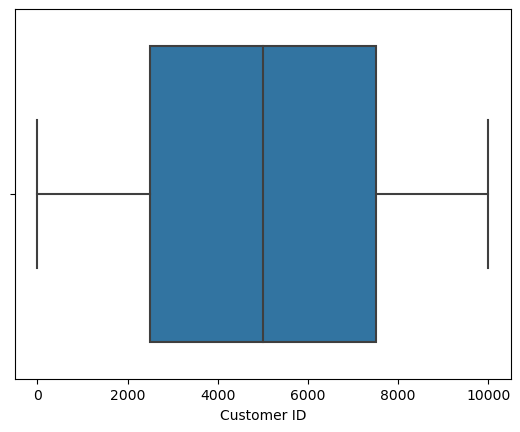

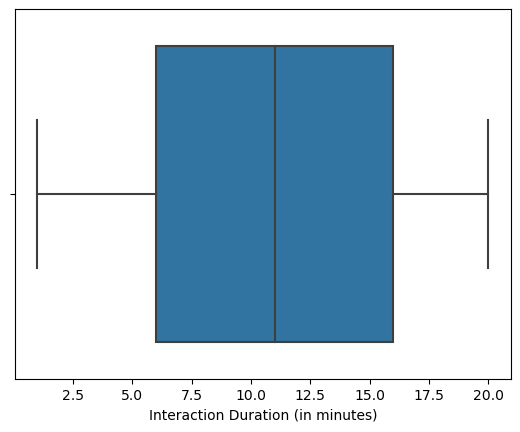

In [23]:
import warnings
warnings.filterwarnings("ignore")
for i in df1.select_dtypes(include="number").columns:
    sns.boxplot(data=df1,x=i)
    plt.show()

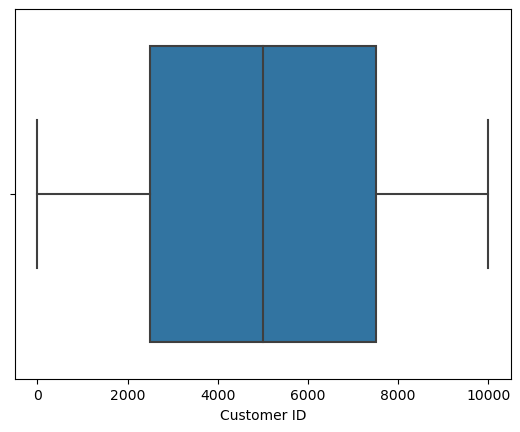

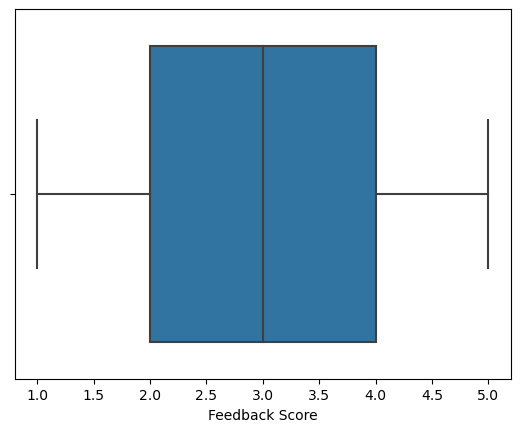

In [25]:
import warnings
warnings.filterwarnings("ignore")
for i in df2.select_dtypes(include="number").columns:
    sns.boxplot(data=df2,x=i)
    plt.show()

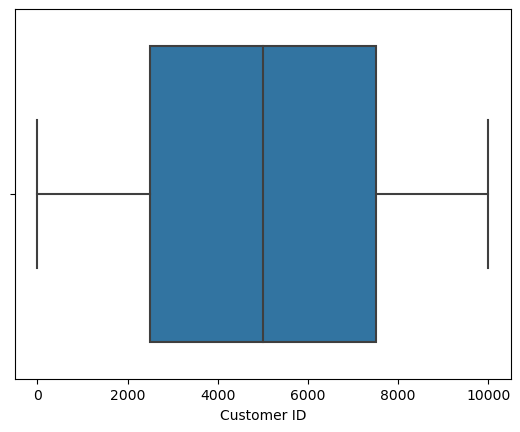

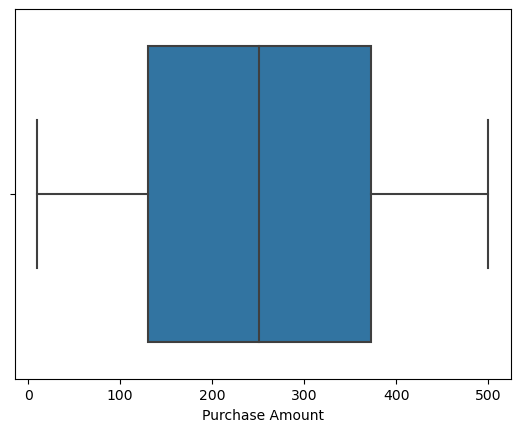

In [27]:
import warnings
warnings.filterwarnings("ignore")
for i in df3.select_dtypes(include="number").columns:
    sns.boxplot(data=df3,x=i)
    plt.show()

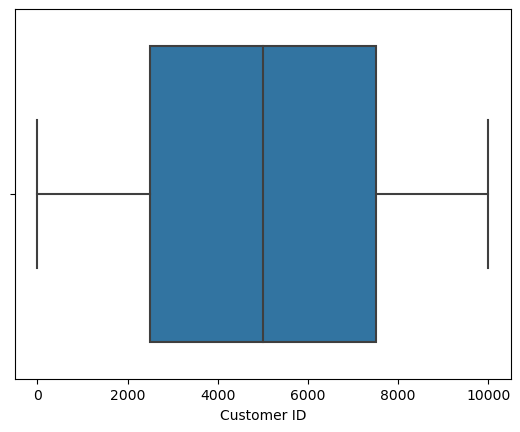

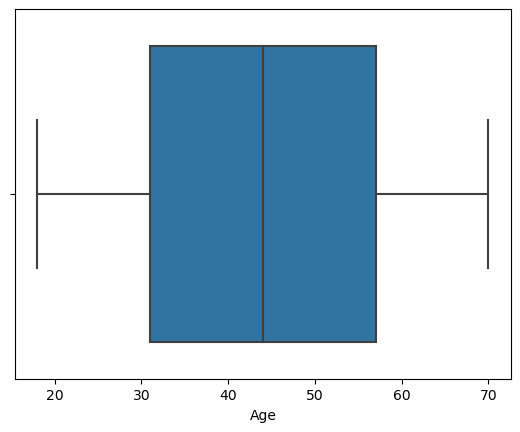

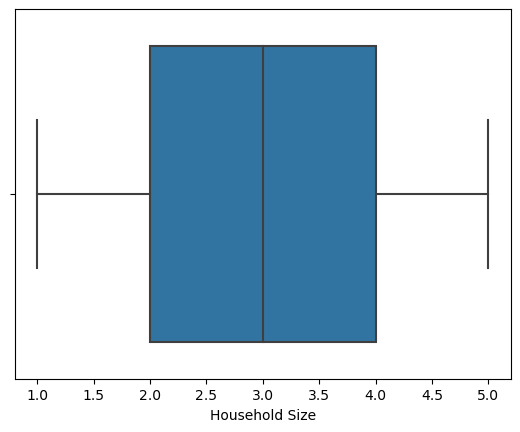

In [29]:
import warnings
warnings.filterwarnings("ignore")
for i in df4.select_dtypes(include="number").columns:
    sns.boxplot(data=df4,x=i)
    plt.show()

### Cleaning Gender Column (Sheet-4)

In [31]:
df4['Gender'] = df4['Gender'].replace({'F': 'Female', 'fem': 'Female', 'Female': 'Female', 'Male': 'Male', 'Other': 'Other', 'O': 'Other'})

### Checking for Missing Values

In [33]:
print("\nMissing values after cleaning:")
print(df1.isnull().sum())


Missing values after cleaning:
Customer ID                          0
Interaction Date                     0
Interaction Channel                  0
Interaction Type                     0
Interaction Duration (in minutes)    0
Interaction Outcome                  0
Device Type                          0
Conversion Status                    0
dtype: int64


In [35]:
print("\nMissing values after cleaning:")
print(df2.isnull().sum())


Missing values after cleaning:
Customer ID          0
Feedback Date        0
Feedback Channel     0
Feedback Text        0
Sentiment Score      0
Feedback Category    0
Feedback Score       0
Response Time        0
Follow-up Status     0
Resolution Time      0
dtype: int64


In [37]:
print("\nMissing values after cleaning:")
print(df3.isnull().sum())


Missing values after cleaning:
Customer ID              0
Transaction ID           0
Transaction Date         0
Product ID               0
Product Category         0
Purchase Amount          0
Payment Method           0
Discount Applied         0
Loyalty Points Earned    0
Refund Status            0
Shipping Method          0
dtype: int64


In [39]:
print("\nMissing values after cleaning:")
print(df4.isnull().sum())


Missing values after cleaning:
Customer ID                        0
Age                                0
Gender                             0
Location                           0
Income Bracket                     0
Segment                            0
Education Level                    0
Marital Status                     0
Household Size                     0
Preferred Communication Channel    0
dtype: int64


In [41]:
df1.to_csv('customer_interaction_data_cleaned.csv', index=False)
df2.to_csv('customer_feedback_data_cleaned.csv', index=False)
df3.to_csv('transaction_purchase_data_cleaned.csv', index=False)
df4.to_csv('demographic_segmentation_data_cleaned.csv', index=False)

# Data Cleaned